# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
#import scipy.stats as stats
from scipy.stats import linregress
#from scipy.stats import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
study_results["Tumor Volume (mm3)"] = study_results["Tumor Volume (mm3)"].apply(lambda x: format(x, ".1f"))

# Combine the data into a single DataFrame
mice_data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])
mice_data_complete['Tumor Volume (mm3)'] = pd.to_numeric(mice_data_complete['Tumor Volume (mm3)'], errors='coerce')

# Display the data table for preview
mice_data_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.6,2,Capomulin,Male,12,25
1889,u364,45,31.0,3,Capomulin,Male,18,17
1890,p438,45,61.4,1,Ceftamin,Female,11,26
1891,x773,45,58.6,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
total_mice = mice_data_complete["Mouse ID"].nunique()
total_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ids = mice_data_complete[mice_data_complete.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()
                                
# list duplicates
duplicate_mice_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# list duplicates
duplicate_mice_data = mice_data_complete[mice_data_complete['Mouse ID'].isin(duplicate_mice_ids)]
duplicate_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.0,0,Propriva,Female,21,26
137,g989,0,45.0,0,Propriva,Female,21,26
329,g989,5,48.8,0,Propriva,Female,21,26
360,g989,5,47.6,0,Propriva,Female,21,26
620,g989,10,51.7,0,Propriva,Female,21,26
681,g989,10,49.9,0,Propriva,Female,21,26
815,g989,15,51.3,1,Propriva,Female,21,26
869,g989,15,53.4,0,Propriva,Female,21,26
950,g989,20,55.3,1,Propriva,Female,21,26
1111,g989,20,54.7,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_data_complete_no_duplicate = mice_data_complete[~mice_data_complete['Mouse ID'].isin(duplicate_mice_ids)]
mice_data_complete_no_duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.6,2,Capomulin,Male,12,25
1889,u364,45,31.0,3,Capomulin,Male,18,17
1890,p438,45,61.4,1,Ceftamin,Female,11,26
1891,x773,45,58.6,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
total_mice_no_duplicate = mice_data_complete_no_duplicate["Mouse ID"].nunique()
total_mice_no_duplicate

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

#filter dataset table 
meds_summary = mice_data_complete_no_duplicate[["Drug Regimen", "Tumor Volume (mm3)"]]
meds_summary = meds_summary.set_index("Drug Regimen").sort_index()
meds_summary


,Tumor Volume (mm3)
Drug Regimen,
Capomulin,45.0
Capomulin,39.5
Capomulin,25.5
Capomulin,41.4
Capomulin,31.4
...,...
Zoniferol,46.6
Zoniferol,48.9
Zoniferol,60.3


In [8]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Group by 'Drug Regimen' and calculate the required statistics
meds_summary["Tumor Volume (mm3)"] = pd.to_numeric(meds_summary["Tumor Volume (mm3)"], errors="coerce")
mean_tumor = meds_summary.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor = meds_summary.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_tumor = meds_summary.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_dev_tumor = meds_summary.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_tumor = meds_summary.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
meds_summary_statistics = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor,
    "Median Tumor Volume": median_tumor,
    "Tumor Volume Variance": var_tumor,
    "Tumor Volume Std. Dev": std_dev_tumor,
    "Tumor Volume Std. Err.": sem_tumor
})
#print dataframe
meds_summary_statistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.678261,41.55,24.954809,4.995479,0.329392
Ceftamin,52.589326,51.80,39.254292,6.265325,0.469606
Infubinol,52.885955,51.80,43.074321,6.563103,0.491925
Ketapril,55.237766,53.70,68.553379,8.279697,0.603859
Naftisol,54.330108,52.50,66.178440,8.135013,0.596488
Placebo,54.032044,52.30,61.148079,7.819724,0.581235
Propriva,52.320946,50.45,43.887926,6.624796,0.544555
Ramicane,40.217982,40.70,23.472054,4.844797,0.320854
Stelasyn,54.235359,52.40,59.453965,7.710640,0.573127


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
meds_summary_statistics_agg = meds_summary.groupby("Drug Regimen").agg(
        mean =("Tumor Volume (mm3)",'mean'), 
        median =("Tumor Volume (mm3)", "median"),
        variance =("Tumor Volume (mm3)", "var"),
        std_dev = ("Tumor Volume (mm3)", "std"),
        sem = ("Tumor Volume (mm3)", "sem")
)
meds_summary_statistics_agg

,mean,median,variance,std_dev,sem
Drug Regimen,,,,,
Capomulin,40.678261,41.55,24.954809,4.995479,0.329392
Ceftamin,52.589326,51.80,39.254292,6.265325,0.469606
Infubinol,52.885955,51.80,43.074321,6.563103,0.491925
Ketapril,55.237766,53.70,68.553379,8.279697,0.603859
Naftisol,54.330108,52.50,66.178440,8.135013,0.596488
Placebo,54.032044,52.30,61.148079,7.819724,0.581235
Propriva,52.320946,50.45,43.887926,6.624796,0.544555
Ramicane,40.217982,40.70,23.472054,4.844797,0.320854
Stelasyn,54.235359,52.40,59.453965,7.710640,0.573127


## Bar and Pie Charts

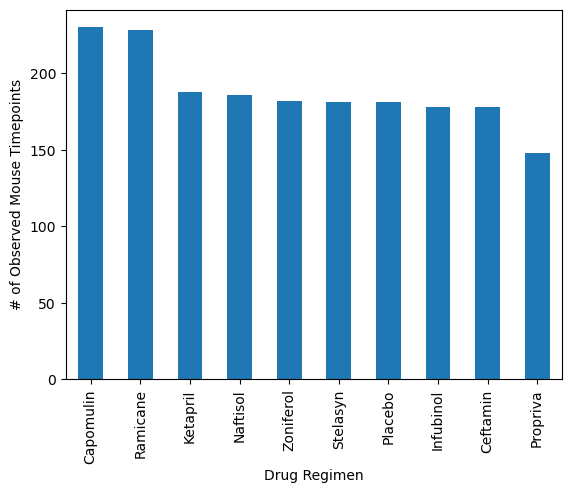

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#count per drug regimen
drug_regimen_count = mice_data_complete_no_duplicate["Drug Regimen"].value_counts()
#bar plot
drug_regimen_count.plot.bar(x="Drug Regimen", y="Timepoint")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

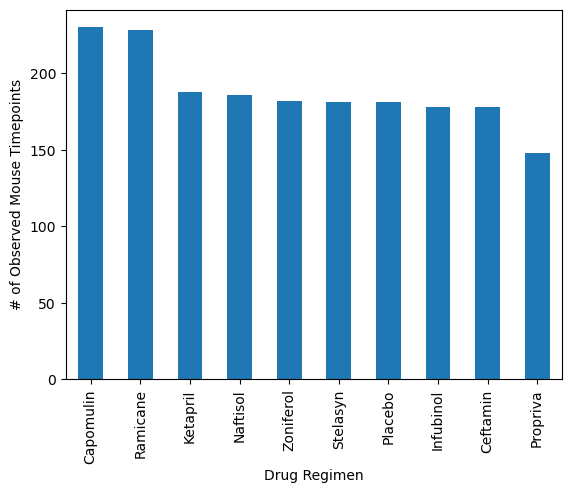

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_count.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

Text(0, 0.5, 'Sex')

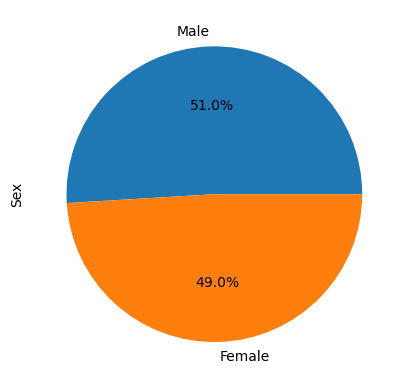

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex =  mice_data_complete_no_duplicate["Sex"].value_counts()
mice_sex.plot.pie(labels=mice_sex.index, autopct='%1.1f%%')
plt.ylabel("Sex")



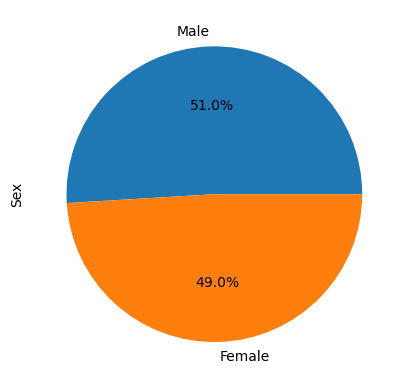

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#plt.figure(figsize=(8, 8))
plt.pie(mice_sex, labels=mice_sex.index, autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Filter the dataset for the specified drug regimens
drug_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
filtered_data = mice_data_complete[mice_data_complete['Drug Regimen'].isin(drug_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(max_timepoints, filtered_data, on=['Mouse ID', 'Timepoint'], how='left')
merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,68.0,2,Infubinol,Female,20,23
1,a251,45,65.5,1,Infubinol,Female,21,25
2,a275,45,63.0,3,Ceftamin,Female,20,28
3,a411,45,38.4,1,Ramicane,Male,3,22
4,a444,45,43.0,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.6,4,Ceftamin,Female,6,27
96,y793,45,31.9,2,Capomulin,Male,17,17
97,y865,45,64.7,3,Ceftamin,Male,23,26
98,z578,45,30.6,0,Ramicane,Male,11,16


In [15]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bound

treatments = drug_regimens
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = merged_data[merged_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Add the data to the list for plotting
    tumor_vol_data.append(treatment_data)
    
    # Calculate the IQR
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    print(f"{treatment} treatment:")
    print(f"Lower quartile: {lowerq}")
    print(f"Upper quartile: {upperq}")
    print(f"IQR: {iqr}")
    
    # Determine potential outliers using the IQR
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    print(f"Potential outliers: Tumor volumes below {lower_bound} or above {upper_bound}\n")
    
    # Determine outliers
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    print(f"Outliers: {outliers.tolist()}\n")

# Display the tumor volume data for plotting
print(tumor_vol_data)

Capomulin treatment:
Lower quartile: 32.4
Upper quartile: 40.2
IQR: 7.800000000000004
Potential outliers: Tumor volumes below 20.699999999999992 or above 51.900000000000006

Outliers: []

Ramicane treatment:
Lower quartile: 31.6
Upper quartile: 40.7
IQR: 9.100000000000001
Potential outliers: Tumor volumes below 17.95 or above 54.35000000000001

Outliers: []

Infubinol treatment:
Lower quartile: 54.0
Upper quartile: 65.5
IQR: 11.5
Potential outliers: Tumor volumes below 36.75 or above 82.75

Outliers: [36.3]

Ceftamin treatment:
Lower quartile: 48.7
Upper quartile: 64.3
IQR: 15.599999999999994
Potential outliers: Tumor volumes below 25.30000000000001 or above 87.69999999999999

Outliers: []

[9     39.0
12    38.9
24    30.5
25    37.1
26    40.2
32    47.7
33    37.3
34    38.1
35    38.8
45    41.5
49    38.8
51    28.4
53    33.3
64    46.5
65    32.4
68    41.6
70    23.3
72    40.7
73    34.5
78    31.0
82    40.7
83    40.0
88    36.0
90    28.5
96    31.9
Name: Tumor Volume (mm3)

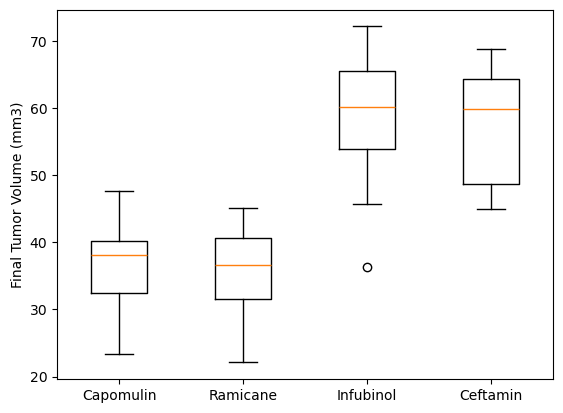

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

boxplot_data = [merged_data[merged_data['Drug Regimen'] == regimen]['Tumor Volume (mm3)'] for regimen in drug_regimens]
plt.boxplot(boxplot_data, labels=drug_regimens)
plt.ylabel('Final Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

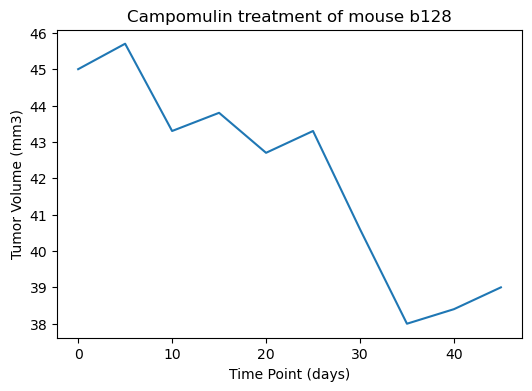

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = mice_data_complete[mice_data_complete['Drug Regimen'] == 'Capomulin']
mouse_id = 'b128'  # You can change this ID to any mouse treated with Capomulin
single_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

# Generate a line plot of tumor volume vs. time point for the selected mouse
plt.figure(figsize=(6, 4))
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'])

# Add title and labels
plt.title(f'Campomulin treatment of mouse {mouse_id}')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()


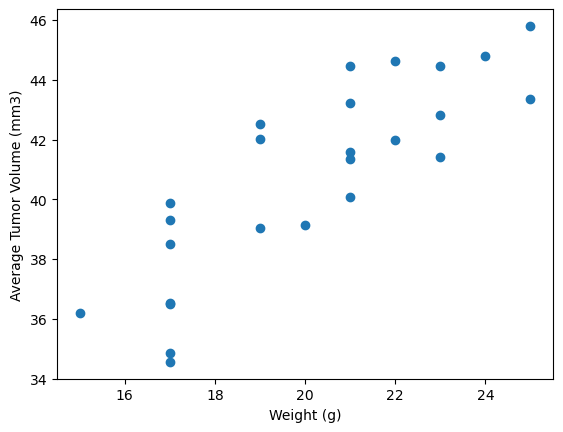

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = mice_data_complete[mice_data_complete['Drug Regimen'] == 'Capomulin']
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
capomulin_avg_data = pd.merge(avg_tumor_volume, mouse_metadata, on='Mouse ID')


plt.scatter(capomulin_avg_data['Weight (g)'], capomulin_avg_data['Tumor Volume (mm3)'])

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


# Display the plot
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is  0.84


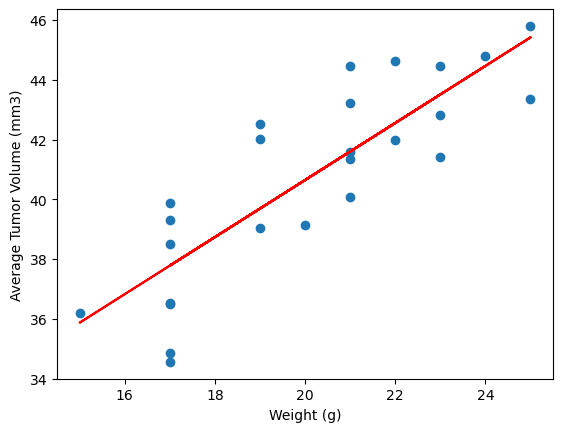

Slope:  0.95
Intercept:  21.55
R-squared:  0.71
P-value:  0.00
Standard error:  0.13


In [29]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


# Filter the data for the Capomulin regimen
capomulin_data = mice_data_complete[mice_data_complete['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Merge the average tumor volume data with the mouse metadata
capomulin_avg_data = pd.merge(avg_tumor_volume, mouse_metadata, on='Mouse ID')

# Extract the weight and average tumor volume
weight = capomulin_avg_data['Weight (g)']
tumor_volume = capomulin_avg_data['Tumor Volume (mm3)']

# Calculate the correlation coefficient
correlation_coefficient = weight.corr(tumor_volume)
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient: .2f}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(weight, tumor_volume)

# Plot the scatter plot and the regression line
plt.scatter(weight, tumor_volume, label='Data')
plt.plot(weight, slope * weight + intercept, color='red', label='Fitted line')

# Set the labels for the plot
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
#plt.legend()

# Display the plot
plt.show()

# Print the results of the linear regression
print(f"Slope: {slope: .2f}")
print(f"Intercept: {intercept: .2f}")
print(f"R-squared: {r_value**2: .2f}")
print(f"P-value: {p_value: .2f}")
print(f"Standard error: {std_err: .2f}")